In [1]:
%matplotlib inline

###KAUFMAN LAB LIBRARY
klib_version = '1.1'

import sys
sys.path.append('klab_python_lib_Yb/')

import klib
if klib.__version__ != klib_version:
    raise ValueError('Incorrect klib version number.')

from klib.imports import *

from klib.analysis import *
from klib.plotutil import *
from klib.motimage2D import *
from klib.motimage3D import *
from klib.Yb_constants import *
from klib.zynq_client import *

from skimage import io
import matplotlib.pyplot as plt

import numpy as np
from scipy import special
%matplotlib inline
import tqdm
from scipy.optimize import curve_fit
from skimage import feature
import scipy.constants as sc
from skimage import data
import glob
from natsort import natsorted
#from vimba import *
import importlib
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.special import jv
from mpl_toolkits.axes_grid1 import make_axes_locatable


kB=sc.k #boltzmann cont
pi=np.pi
c=sc.c
h=sc.h
g=sc.g
eps0 = sc.epsilon_0
au=sc.physical_constants['atomic mass constant'][0]
dataAddress = Path(os.getcwd())
from scipy.linalg import expm

# generate freqLUT

In [26]:
numtones0 = 48
numtones1 = 48

# freqcenterD1 = 77.5
# spacingD1 = 1.2/3

# freqcenterD0 = 85
# spacingD0 = 1.2

fsx = 1.000398609582314
fsy = 1.001070102090829

freqcenterD1 = 77.5 + 0.15269024706813894 - 0.021543544250239077 + 0.243
spacingD1 = 0.6*fsy

freqcenterD0 = 85 + 0.2203665053375253 + 0.748
spacingD0 = 0.6*fsx

freqsD0start = freqcenterD0-spacingD0*(numtones0-1)/2
freqsD0end = freqcenterD0+spacingD0*numtones0/2
freqsD1start = freqcenterD1-spacingD1*(numtones1-1)/2
freqsD1end = freqcenterD1+spacingD1*numtones1/2

freqsD0 = np.linspace(freqsD0start, freqsD0end, numtones0)
freqsD1 = np.linspace(freqsD1start, freqsD1end, numtones1)

In [27]:
arrFreqLUTNew0 = np.transpose(np.tile(freqsD0, (numtones0,1)))
arrFreqLUTNew1 = np.tile(freqsD1, (numtones1,1))

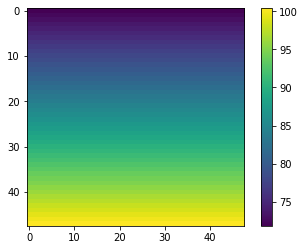

In [28]:
plt.imshow(arrFreqLUTNew0)
plt.colorbar()

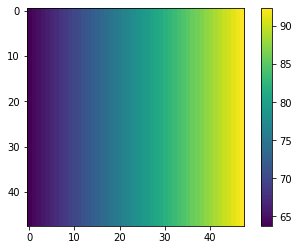

In [29]:
plt.imshow(arrFreqLUTNew1)
plt.colorbar()

In [30]:
arrFreqLUTNew = np.stack((arrFreqLUTNew0, arrFreqLUTNew1), axis=2)

In [31]:
np.save("C://Users/klab/Documents/Chimera-Control-Master/Tweezer LUT/freqLUT.npy", arrFreqLUTNew)

## generate uniform amplitudes

In [34]:
arrAmpLUT = np.ones((numtones0, numtones1, 2))*70

In [35]:
np.save("C://Users/klab/Documents/Chimera-Control-Master/Tweezer LUT/ampLUT.npy", arrAmpLUT)

In [12]:
np.shape(arrAmpLUT)

(48, 48, 2)

In [16]:
np.shape(arrFreqLUTNew)

(48, 48, 2)

In [57]:
tp = 450/7
tpdbm = 10*np.log10(tp)
tpdbm

18.081144737610867

# generate amplitudes from balanced values

In [2]:
ampD0 = np.load('../Yb_data/ampD0.npy')
ampD1 = np.load('../Yb_data/ampD1.npy')

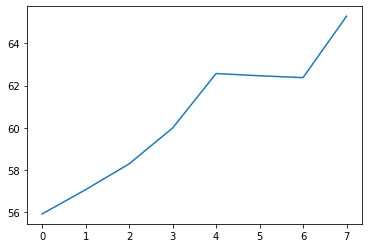

In [3]:
plt.plot(ampD0)

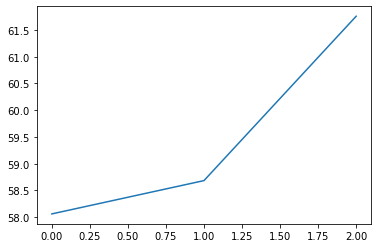

In [4]:
plt.plot(ampD1)

In [ ]:
pfitampD0 = np.polyfit()

In [42]:
freqlut = np.load("C://Users/klab/Documents/Chimera-Control-Master/Tweezer LUT/freqLUT.npy")
freqluttemp = np.load("C://Users/klab/Documents/Chimera-Control-Master/Tweezer LUT/freqLUT_temp.npy")

In [47]:
freqlut[1,0,0] - freqlut[0,0,0]

1.2127659574468055

In [44]:
freqlut[0,1,1] - freqlut[0,0,1]

0.4042553191489304

In [46]:
fsx/((freqluttemp[1,0,0] - freqluttemp[0,0,0])/(freqlut[1,0,0] - freqlut[0,0,0]))

0.9999999999999991

In [48]:
fsy/((freqluttemp[0,1,1] - freqluttemp[0,0,1])/(freqlut[0,1,1] - freqlut[0,0,1]))

0.9999999999999911

In [50]:
freqlut = np.load("C://Users/klab/Documents/Chimera-Control-Master/Tweezer LUT/freqLUT.npy")

In [51]:
freqlut[1,0,0] - freqlut[0,0,0]

1.2132493775785491